# Objašnjiva umjetna inteligencija (XAI)
## Skin Cancer MNIST: HAM10000

In [3]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import sklearn.metrics as metrics
from imblearn.over_sampling import RandomOverSampler
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D

### Pregled skupa podataka
#### Baza podataka o srčanim bolestima

HAM10000 ("Human Against Machine with 10000 training images") je skup 10015 dermatoskopskih slika iz različitih populacija, snimljenih i pohranjenih različitim metodama.

Slučajevi uključuju reprezentativnu kolekciju svih važnih dijagnostičkih kategorija pigmentiranih lezija: aktiničke keratoze i intraepitelni karcinom / Bowenova bolest (akiec), bazocelularni karcinom (bcc), benigne keratoze (solarne lentigine / seboreične keratoze i keratoze slične lišaju planusu, bkl), dermatofibrom (df), melanom (mel), melanocitni nevusi (nv) i vaskularne lezije (angiomi, angioqueratomi, piogeni granulomi i hemoragije, vasc).

In [4]:
dataset_images_RGB = pd.read_csv("data/hmnist_28_28_RGB.csv")
print(dataset_images_RGB.head(3))
print('Slike: ', dataset_images_RGB.shape)

   pixel0000  pixel0001  pixel0002  pixel0003  pixel0004  pixel0005  \
0        192        153        193        195        155        192   
1         25         14         30         68         48         75   
2        192        138        153        200        145        163   

   pixel0006  pixel0007  pixel0008  pixel0009  ...  pixel2343  pixel2344  \
0        197        154        185        202  ...        173        124   
1        123         93        126        158  ...         60         39   
2        201        142        160        206  ...        167        129   

   pixel2345  pixel2346  pixel2347  pixel2348  pixel2349  pixel2350  \
0        138        183        147        166        185        154   
1         55         25         14         28         25         14   
2        143        159        124        142        136        104   

   pixel2351  label  
0        177      2  
1         27      2  
2        117      2  

[3 rows x 2353 columns]
Slike:  (100

In [ ]:
dataset_meta = pd.read_csv("data/HAM10000_metadata.csv")
print(dataset_meta.head(3))
print('Metapodaci: ', dataset_meta.shape)

     lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
Metapodaci:  (10015, 7)


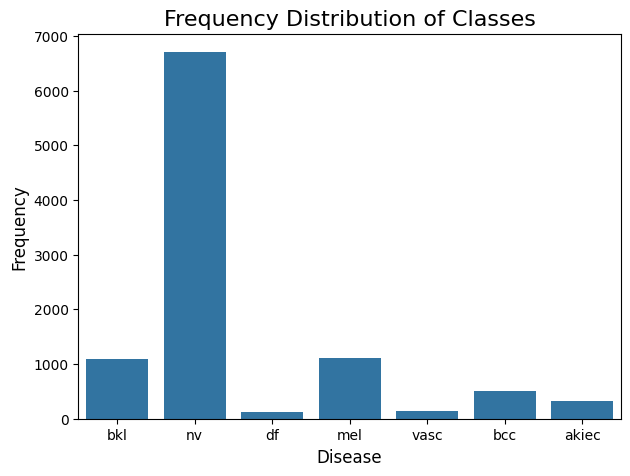

In [6]:
bar, ax = plt.subplots(figsize=(7, 5))
sns.countplot(x = 'dx', data = dataset_meta)
plt.xlabel('Disease', size=12)
plt.ylabel('Frequency', size=12)
plt.title('Frequency Distribution of Classes', size=16)
plt.show()

In [7]:
fig = px.histogram(data_frame=dataset_meta, x='age', color= 'sex')
fig.show()

### CNN (Convolutional Neural Network)

In [8]:
num_classes = 7
batch_size = 128
epochs = 10

img_rows = 28
img_cols = 28

In [9]:
images = dataset_images_RGB.drop(['label'], axis=1)
labels = dataset_images_RGB['label']

In [10]:
oversample = RandomOverSampler()
images, labels = oversample.fit_resample(images, labels)

In [11]:
images = np.array(images)
images = images.reshape(-1, 28, 28, 3)
print('Shape of images: ', images.shape)

images = np.array(images)
images = images.reshape(-1, 28, 28, 3)
print('Shape of images: ', images.shape)

Shape of images:  (46935, 28, 28, 3)
Shape of images:  (46935, 28, 28, 3)


In [12]:
x_train, x_test, y_train, y_test = train_test_split(images, labels,
random_state=1, test_size=0.20)

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [13]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',
input_shape=(img_rows, img_cols, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.40))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 5, 5, 64)          0         
                                                                 
 flatten (Flatten)           (None, 1600)              0

In [14]:
callback = tf.keras.callbacks.ModelCheckpoint(filepath='CNN/cnn-RGB.keras', monitor='val_acc', mode='max', verbose=1)
model.compile(loss=keras.losses.categorical_crossentropy,
optimizer='adam', metrics=['accuracy'])

In [15]:
history = model.fit(x_train, y_train, batch_size=batch_size,
epochs=epochs, validation_split=0.2, callbacks=[callback])

Epoch 1/10
235/235 [==============================] - ETA: 0s - loss: 2.7896 - accuracy: 0.3393
Epoch 1: saving model to CNN\cnn-RGB.keras
235/235 [==============================] - 10s 40ms/step - loss: 2.7896 - accuracy: 0.3393 - val_loss: 1.4271 - val_accuracy: 0.4442
Epoch 2/10
235/235 [==============================] - ETA: 0s - loss: 1.4210 - accuracy: 0.4320
Epoch 2: saving model to CNN\cnn-RGB.keras
235/235 [==============================] - 9s 40ms/step - loss: 1.4210 - accuracy: 0.4320 - val_loss: 1.2047 - val_accuracy: 0.5352
Epoch 3/10
235/235 [==============================] - ETA: 0s - loss: 1.2810 - accuracy: 0.4819
Epoch 3: saving model to CNN\cnn-RGB.keras
235/235 [==============================] - 10s 41ms/step - loss: 1.2810 - accuracy: 0.4819 - val_loss: 1.1361 - val_accuracy: 0.5722
Epoch 4/10
235/235 [==============================] - ETA: 0s - loss: 1.2138 - accuracy: 0.5134
Epoch 4: saving model to CNN\cnn-RGB.keras
235/235 [==============================] - 10s

#### Evaluacija

In [16]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' %(score[0], score[1]))

Summary: Loss over the test dataset: 0.58, Accuracy: 0.80


294/294 [==============================] - 1s 4ms/step


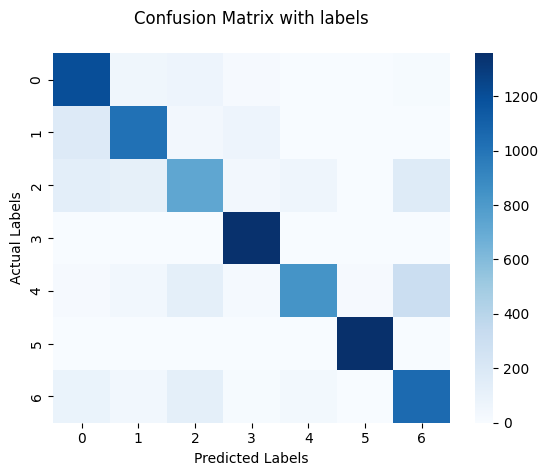

In [17]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis =1)
confusion_matrix = metrics.confusion_matrix(y_true=y_true,
y_pred=y_pred_classes )

ax = sns.heatmap(confusion_matrix, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix with labels\n');
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('Actual Labels')
plt.show()

### Saliency maps (Pixel Attribution)

In [18]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras import backend as K
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils import normalize
from vis.utils import utils

from tf_keras_vis.utils.scores import CategoricalScore

import random

In [19]:
layer_idx = utils.find_layer_idx(model, model.layers[-1].name)
model.layers[-1].activation = tf.keras.activations.linear
model = utils.apply_modifications(model)

C:\Users\Antonia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\keras\src\engine\training.py:3000: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



1/1 [==============================] - 0s 16ms/step
Model output: [[ -5.529092  -6.287302  13.48935  -20.948671  20.702822 -16.64197
   22.525131]]
Model prediction: 6
True clasification: 6


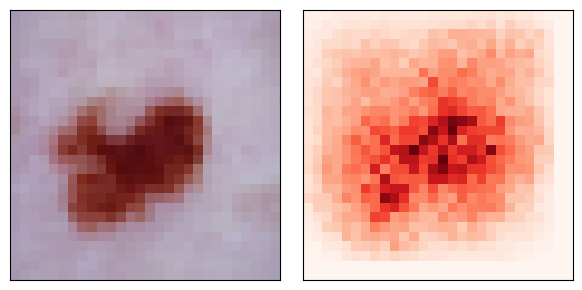

1/1 [==============================] - 0s 17ms/step
Model output: [[-14.7710285   2.7037752  -3.7271929  -6.8785734   1.9419974  13.436104
   -2.2827864]]
Model prediction: 5
True clasification: 5


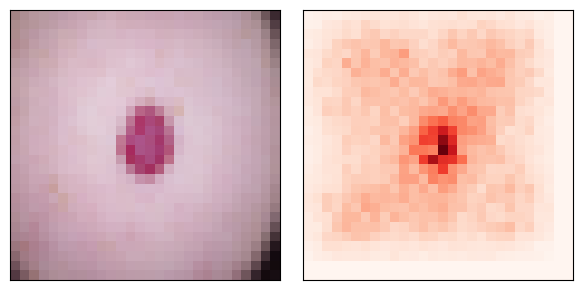

1/1 [==============================] - 0s 15ms/step
Model output: [[ 2.5476182  2.0607042  0.9720427 -1.2882347 -1.3925024 -2.9985223
   0.1737361]]
Model prediction: 0
True clasification: 0


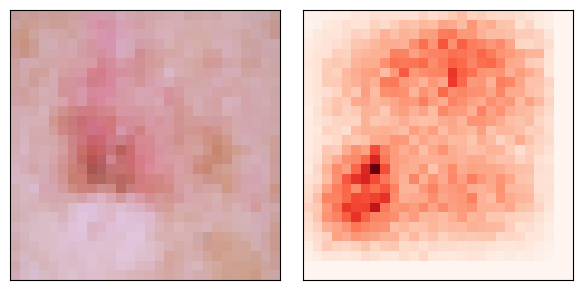

1/1 [==============================] - 0s 16ms/step
Model output: [[ 2.343579   1.5000801  0.9288622  1.1681467 -1.5176104 -4.371785
  -1.5361764]]
Model prediction: 0
True clasification: 0


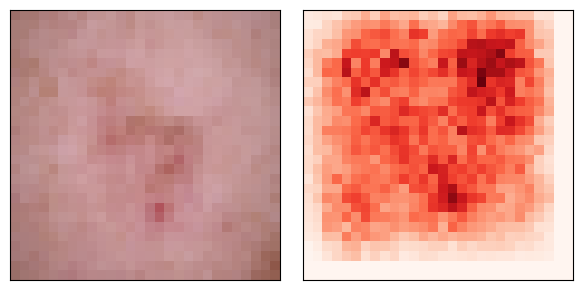

1/1 [==============================] - 0s 17ms/step
Model output: [[ 2.1948698   0.42213526  3.3318202  -3.0356596  -0.38792053 -4.226078
   1.4361802 ]]
Model prediction: 2
True clasification: 2


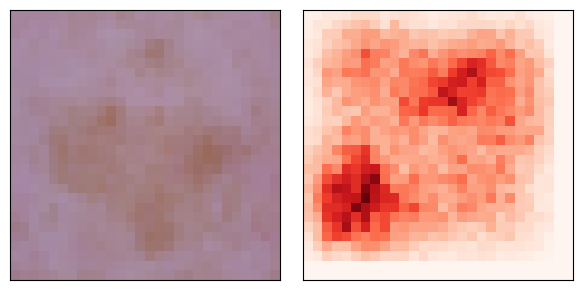

In [21]:
def saliencyPlot(img_index = 0): 
   x = x_test[img_index]
   x = x.reshape((1,) + x.shape)
   x = np.array(x, dtype=np.float32)

   prediction = model.predict(x)
   y_prediction = np.argmax(prediction)
   y_true = np.argmax([y_test[img_index]])
   print(f"Model output: {prediction}")
   print(f"Model prediction: {y_prediction}")
   print(f"True clasification: {y_true}")

   score = CategoricalScore([y_prediction])

   saliency = Saliency(model, clone=False)

   saliency_map = saliency(score, x, smooth_samples=20)
   saliency_map = normalize(saliency_map)

   subplot_args = {
      'nrows': 1,
      'ncols': 2,
      'figsize': (6, 3),
      'subplot_kw': {'xticks': [], 'yticks': []}
   }

   f, ax = plt.subplots(**subplot_args)
   ax[0].imshow(x_test[img_index])
   ax[1].imshow(saliency_map[0], cmap='Reds')
   plt.tight_layout()
   plt.show()
   
for i in range(5):
   saliencyPlot(random.randrange(0, len(x_test)))
